# Introduction to Image Classification (CIFAR-10)
This notebook demonstrates a simple classification of RGB images with **Keras/Tensorflow** and **Convolution Neural Network**.

## Load and visualize data
First, we load and visualize part of **CIFAR-10** to understand the dataset. \
Keras contains multiple datasets which is handy for quick prototyping. 

- 50000 Training Data
    - x : 50000 images of resolution 32x32 with 3 colours (RGB)
    - y : 50000 integers
- 10000 Test Data
    - x : 10000 images of resolution 32x32 with 3 colours (RGB)
    - y : 10000 integers 

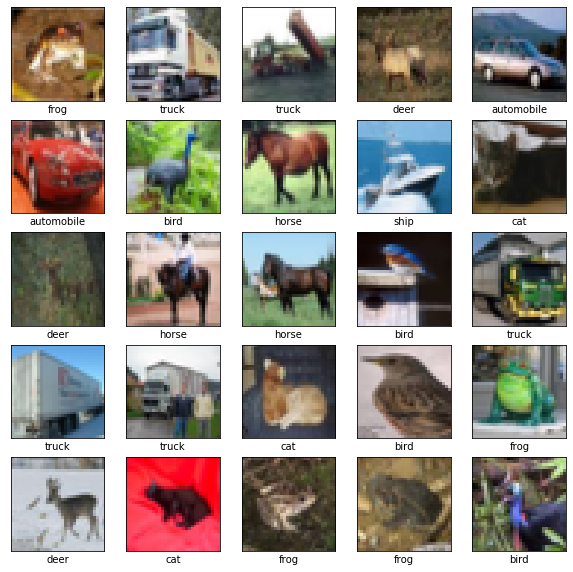

In [2]:
import numpy as np
import keras
import tensorflow as tf
from keras.datasets import cifar10
import matplotlib.pyplot as plt

# Get the training and test data from datasets
# x_train are training images : shape(50000, 32, 32, 3)
# y_train are the training labels : shape(50000, 1)
# x_test are test images : shape(10000, 32, 32, 3)
# y_test are the test labels : shape(10000, 1) 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Visualize a substep of the
category_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
num_categories = len(category_names)

y_train = keras.utils.to_categorical(y_train, num_categories) # replace element from [[2], ... ] to [[0 0 1 0 0 0 0 0 0 0], ...]
y_test = keras.utils.to_categorical(y_test, num_categories) # replace element from [[2], ... ] to [[0 0 1 0 0 0 0 0 0 0], ...]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    index = np.argmax(y_train[i]) # reverse keras.utils.to_categorical
    plt.xlabel(category_names[index])
plt.show()


## Prepare data
The data must be transformed before training the network. \
Pixel values are between 0 and 255 so they can easily be normalized by remapping from [0-255] to [0-1]


In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

## Create a model
We are using a simple ConvNet as our model

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.losses import CategoricalCrossentropy

model = Sequential([Conv2D(32, (3, 3), padding='valid', activation='relu', input_shape=(32, 32, 3)),
                    MaxPooling2D(pool_size=(2,2), padding = 'valid'), 
                    Conv2D(64, (3, 3), padding='valid', activation='relu'),
                    MaxPooling2D(pool_size=(2,2), padding = 'valid'), 
                    Conv2D(128, (3, 3), padding='valid', activation='relu'),
                    MaxPooling2D(pool_size=(2,2), padding = 'valid'), 
                    Flatten(),
                    Dense(256, activation='relu'), 
                    Dense(128, activation='relu'),
                    Dense(num_categories, activation='softmax')])

model.compile(optimizer='adam', 
              loss=CategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

## Training
It is time to train the neural network with **backpropagation**. \
We are using 10 iterations (epochs) and 100 examples at a time (batch_size).

In [ ]:
# 20% of the training data are used as validation data
history = model.fit(x_train, y_train, validation_split=0.2, epochs=20, batch_size=100, shuffle=True)

## Prediction
The model is trained with the training data. Lets put to evaluate the test data.

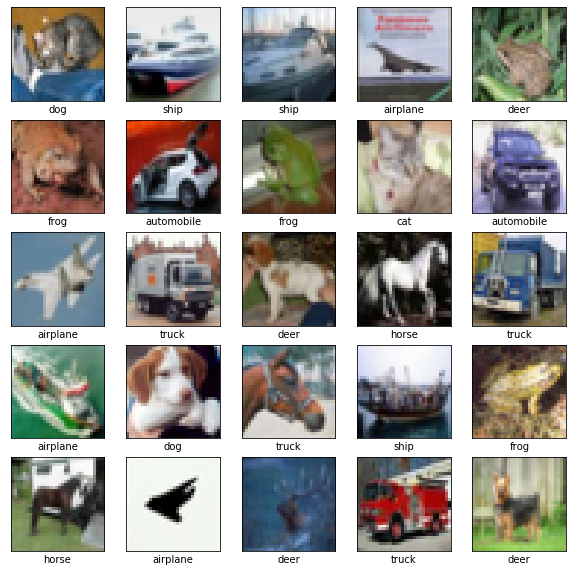

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
y_prediction = model.predict(x_test[0:25])
y_prediction_category_id = np.argmax(y_prediction, axis=1) # reverse keras.utils.to_categorical

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    index = y_prediction_category_id[i]
    plt.xlabel(category_names[index])
plt.show()

## Evaluation metrics


 Test accuracy: 0.6561999917030334


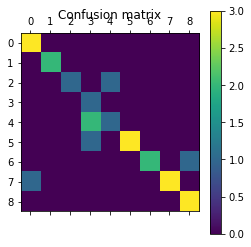


 Plot metrics: ['val_loss', 'val_accuracy', 'loss', 'accuracy']


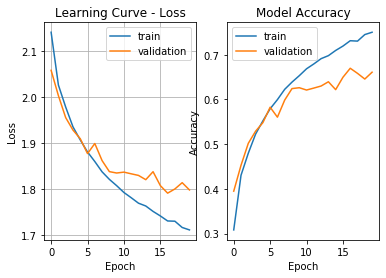

In [7]:
import sklearn.metrics as metrics
print('\n Test accuracy:', test_acc)

# show confusion matrix
y_test_category_id = np.argmax(y_test[0:25], axis=1)
confusion_matrix = metrics.confusion_matrix(y_test_category_id, y_prediction_category_id)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.show()

print('\n Plot metrics:', list(history.history.keys()))
# show history for loss
plt.subplot(1,2,1)
plt.grid(True)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Learning Curve - Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'])
# show history for accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'])
plt.show()

## Visualize weights

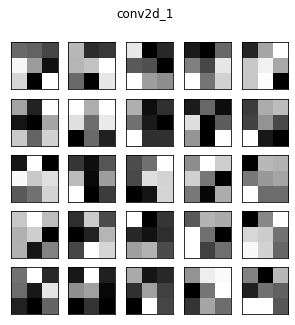

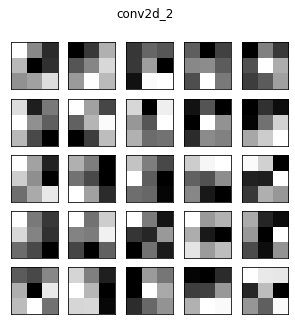

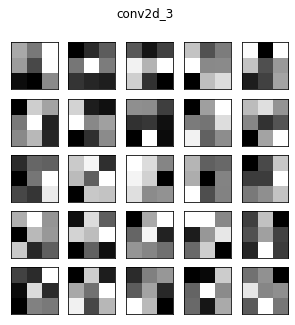

In [8]:
for layer in model.layers:
    if not isinstance(layer, Conv2D):
        continue

    filters, biases = layer.get_weights()
    ranges = [np.min(filters), np.max(filters)]
    filters -= ranges[0]
    filters /= (ranges[1] - ranges[0])

    plt.figure(figsize=(5,5))
    plt.suptitle(layer.name)
    plt.grid(False)
    
    for i in range(25):
        f = filters[:, :, :, i]
        red_channel = f[:,:,0]
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(red_channel, cmap=plt.cm.binary)    
    plt.show()